In [0]:
import os
os.chdir('/content/drive/My Drive/Bank Deposit')

### Abstract
This notebook takes a straightforward approach in predicting whether clients will avail of the term deposit service based on 
the efforts of the implemented direct marketing campaign. The data is the result of the strategy implemented by a certain Portugese bank.

For preprocessing, select variables were preprocessed. Particularly, `job`,`marital`,`education`,`default`,`housing`,`loan`, `contact`, `month`, `day`,
and `poutcome` were re-encoded using `LabelEncoder`. Next, a baseline was established using select algorithms with a K-Fold cross validation. For the baseline, 
KNN achieved the highest accuracy at 91.16%. The accuracy using ensemble methods was then compared and Gradient Boosting emerged with the highest accuracy of 91.35%. 
The latter still trumped a tuned KNN using `n_neighbors` of `21` which yielded an accuracy of 90.32%. Further tunig Gradient Boosting yielded an increase in
accuracy and ended at 91.41% using `n_estimators` of 350. Running Gradient Boosting with the said hyperparameter yielded an accuracy of 91.44% on the test data.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('full-bank.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [0]:
# Convert job, marital, education, default, housing, loan, contact, month, day_of_week, poutocome  via label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

cols = ['job','marital','education','default','housing','loan', 'contact', 'month', 'day_of_week','poutcome']

for _ in cols:
    df[_] = lab_enc.fit_transform(df[_])

Text(0.5, 1.0, 'Count of Categories - age')

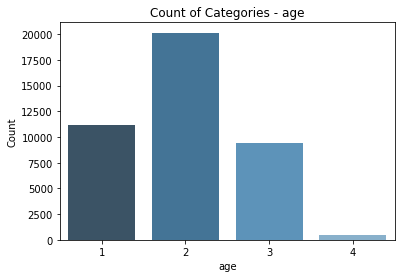

In [0]:
# Create function to group ages
def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4
           
    return df

df = age(df)
sns.countplot(x='age', data=df, palette='Blues_d')
plt.ylabel('Count')
plt.title('Count of Categories - age')

Text(0.5, 1.0, 'Count of Categories - duration')

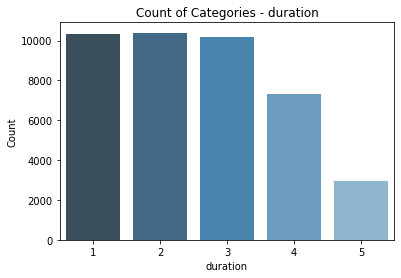

In [0]:
# Convert duration
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']    = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(df)
sns.countplot(x='duration', data=df, palette='Blues_d')
plt.ylabel('Count')
plt.title('Count of Categories - duration')

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [0]:
# Create train test split
x = df.iloc[:,0:20]
y = df.iloc[:,-1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=7)

In [0]:
# Evaluate Algorithm 
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))
models   

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=1000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))

In [0]:
my_cv = []
my_names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)

LR 0.908741 (0.005746)
KNN 0.897451 (0.003671)
CART 0.885888 (0.005431)
NB 0.841791 (0.007209)
XGB 0.912504 (0.004493)
SVC 0.896631 (0.005227)


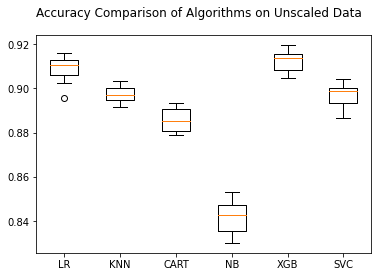

In [0]:
fig = plt.figure()
fig.suptitle('Accuracy Comparison of Algorithms on Unscaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()
##...XGB has the highest accuracy at 91.25% with a std of 0.004493

In [0]:
# Evaluate Algorithm Using Ensembles
ensembles = []
ensembles.append(('ADA', AdaBoostClassifier()))
ensembles.append(('GB', GradientBoostingClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [0]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=7)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)

ADA 0.910167 (0.005134)
GB 0.913505 (0.004203)
ET 0.906373 (0.004043)


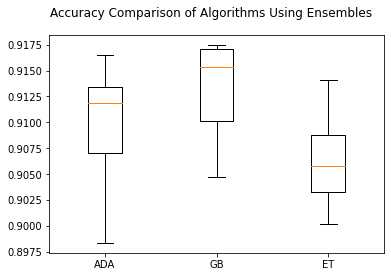

In [0]:
fig = plt.figure()
fig.suptitle('Accuracy Comparison of Algorithms Using Ensembles')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()
#...Gradient Boosting has the highest accuracy with 91.35% and an std of 0.0042

In [0]:
# Tune XGB
min_child_weight = [1, 5, 10]
gamma = [0.5, 1, 1.5, 2, 5]
subsample = [0.6, 0.8, 1.0]
colsample_bytree =  [0.6, 0.8, 1.0]
max_depth = [3, 4, 5]
        
param_grid = dict(min_child_weight = min_child_weight, gamma = gamma, subsample = subsample, colsample_bytree = colsample_bytree, max_depth = max_depth)
model = XGBClassifier()
kfold = KFold(n_splits = 10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, params in zip(means, stds, params):
    print('%f (%f) with %r' % (mean, stds, param))


Best: 0.914628 using {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}


NameError: ignored

In [0]:
# Tune GBM
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=7)
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(x_train, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, params in zip(means, stds, params):
    print('%f (%f) with %r' % (mean, stdev, params))
#...best accuracy is 91.41"% using n_estimators=350

Best: 0.914173 using {'n_estimators': 350}


NameError: ignored

In [0]:
# Predict
model = GradientBoostingClassifier(random_state=7, n_estimators=350)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.91442097596504
[[7045  288]
 [ 417  488]]
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7333
         yes       0.63      0.54      0.58       905

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [0]:
# Note: https://muthu.co/understanding-the-classification-report-in-sklearn/
# TN: Case was negative and predicted negative
# TP: Case was positive and predicted positive
# FN: Case was positive and predicted negative
# FP: Case was negative and predicted positive

# Precision: what percent of your prediction is correct?; vs erroneously classified positive (FP); measure of a model not to label an instance positive that is actually negative; TP/(TP+FP)
# Recall: what percent of the positive cases did  you catch? vs not classified as positive (FN);  fraction of positives that were correctly identified; TP/(TP+FN)
# F1: what percent of positive predictions were correct? used to compare classifier model and not global accuracy; harmonic mean of precision and recall
# F1 = 2 * (Recall*Precision)/(Recall+Precision)

precision=0.63
recall=0.54
(2 * (precision*recall))/(precision+recall)

0.5815384615384616